## Project 5: Random Forests
### Nishat Ahmed, Seyun Kim and Lucia Rhode
Replicate figure 15.3 comparing random forests and gradient boosted trees. You can use whatever package you wish, you don't have to use xgboost if you'd rather keep everything in sci-kit learn. Compare the feature importance found by random forests and gradient boosted trees. 

Select another dataset and repeat the analysis. Pick a dataset we have not yet studied in class.

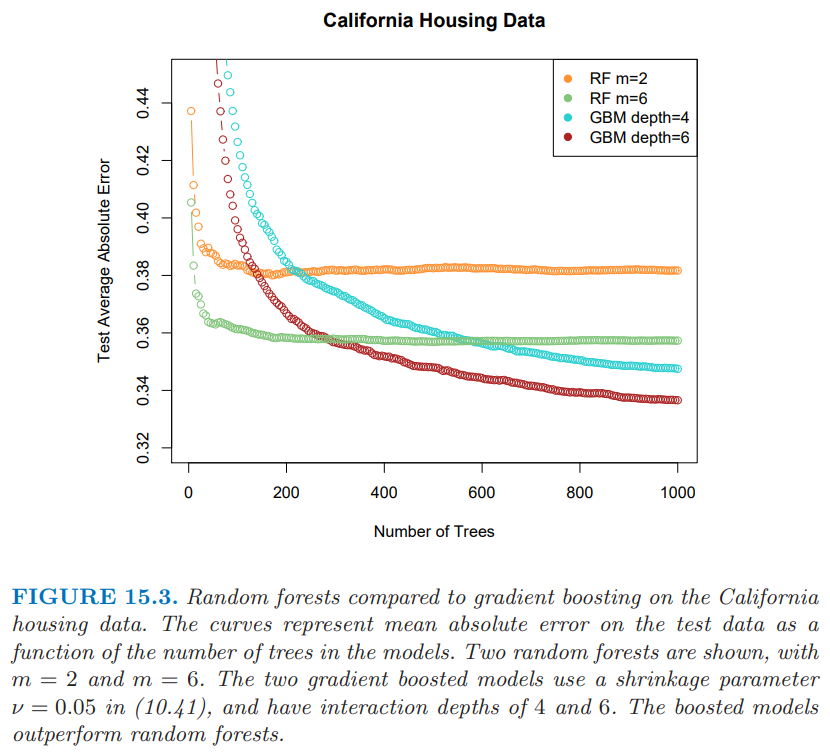

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

#California Housing Dataset

In [41]:
# Load california housing dataset
df = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [42]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [43]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [44]:
x_train = df.drop(['median_house_value'], axis=1)
y_train = df['median_house_value']

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

In [46]:
# Normalize train data
def normalize(data, mean, std):
  x = (data - mean) / (std + 1e-5)
  return x

In [48]:
# Normalize train, test features
X_train_mean = np.zeros(X_train.shape[1])
X_train_std = np.zeros(X_train.shape[1])

X_train_mean = np.mean(X_train)
X_train_std = np.std(X_train)

X_train = normalize(X_train, X_train_mean, X_train_std)
X_test = normalize(X_test, X_train_mean, X_train_std)

In [49]:
start_val = 10
steps = 10
nr_of_steps = 100
end_val = steps*nr_of_steps

In [ ]:
RF2_MAE = np.zeros(nr_of_steps-1)
for nr_trees in range(start_val, end_val, steps):
  rf = RandomForestRegressor(n_estimators=nr_trees, min_samples_split=2, random_state=0, verbose=1)
  rf.fit(X_train, Y_train)
  y_hat_val=rf.predict(X_test)
  index = int((nr_trees/steps) - 1)
  RF2_MAE[index] = mean_absolute_error(Y_test, y_hat_val)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [ ]:
RF6_MAE = np.zeros(nr_of_steps-1)
for nr_trees in range(start_val, end_val, steps):
  rf = RandomForestRegressor(n_estimators=nr_trees, min_samples_split=6, random_state=0, verbose=1)
  rf.fit(X_train, Y_train)
  y_hat_val=rf.predict(X_test)
  index = int((nr_trees/steps) - 1)
  RF6_MAE[index] = mean_absolute_error(Y_test, y_hat_val)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [13]:
GB4_MAE = np.zeros(nr_of_steps-1)
for nr_trees in range(start_val, end_val, steps):
  gb = GradientBoostingRegressor(n_estimators=nr_trees, max_depth=4, random_state=0, verbose=1)
  gb.fit(X_train, Y_train)
  y_hat_val = gb.predict(X_test)
  index = int((nr_trees/steps) - 1)
  GB4_MAE[index] = mean_absolute_error(Y_test, y_hat_val)

      Iter       Train Loss   Remaining Time 
         1 12139271607.3133            0.39s
         2 10980953691.1902            0.36s
         3  9981559059.7018            0.30s
         4  9162847098.5596            0.26s
         5  8503022637.1074            0.21s
         6  7927306576.1654            0.17s
         7  7472220496.3987            0.13s
         8  7065361916.9081            0.09s
         9  6697573530.5598            0.04s
        10  6420190670.4915            0.00s
      Iter       Train Loss   Remaining Time 
         1 12139271607.3133            0.77s
         2 10980953691.1902            0.74s
         3  9981559059.7018            0.71s
         4  9162847098.5596            0.66s
         5  8503022637.1074            0.62s
         6  7927306576.1654            0.57s
         7  7472220496.3987            0.53s
         8  7065361916.9081            0.49s
         9  6697573530.5598            0.44s
        10  6420190670.4915            0.40s
        

In [25]:
GB6_MAE = np.zeros(nr_of_steps-1)
for nr_trees in range(start_val, end_val, steps):
  gb = GradientBoostingRegressor(n_estimators=nr_trees, max_depth=6, random_state=0, verbose=1)
  gb.fit(X_train, Y_train)
  y_hat_val = gb.predict(X_test)
  index = int((nr_trees/steps) - 1)
  GB6_MAE[index] = mean_absolute_error(Y_test, y_hat_val)

      Iter       Train Loss   Remaining Time 
         1 11888941943.7877            0.55s
         2 10530994678.7972            0.48s
         3  9389963248.3149            0.41s
         4  8371031189.8858            0.36s
         5  7595591325.4908            0.30s
         6  6930490001.0071            0.24s
         7  6392697114.1809            0.18s
         8  5921589608.1950            0.12s
         9  5531610462.3082            0.06s
        10  5199996255.0868            0.00s
      Iter       Train Loss   Remaining Time 
         1 11888941943.7877            1.15s
         2 10530994678.7972            1.07s
         3  9389963248.3149            1.03s
         4  8371031189.8858            0.96s
         5  7595591325.4908            0.89s
         6  6930490001.0071            0.83s
         7  6392697114.1809            0.77s
         8  5921589608.1950            0.72s
         9  5531610462.3082            0.65s
        10  5199996255.0868            0.59s
        

In [26]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

# save to csv file, so that I don't need to run the training more than once
savetxt('rf2_mae.csv', RF2_MAE, delimiter=',')
savetxt('rf6_mae.csv', RF6_MAE, delimiter=',')
savetxt('gb4_mae.csv', GB4_MAE, delimiter=',')
savetxt('gb6_mae.csv', GB6_MAE, delimiter=',')

In [50]:
from google.colab import files
files.upload()

Saving gb4_mae.csv to gb4_mae.csv
Saving gb6_mae.csv to gb6_mae.csv
Saving rf6_mae.csv to rf6_mae.csv
Saving rf2_mae.csv to rf2_mae.csv


{'gb4_mae.csv': b'6.142573973957745329e+04\n5.139369784978704411e+04\n4.497619934203922458e+04\n4.067696297966509883e+04\n3.851373135985394765e+04\n3.756191244736849330e+04\n3.640027960759547568e+04\n3.576194259062280616e+04\n3.520761053382915998e+04\n3.474921696759420593e+04\n3.444565347846811346e+04\n3.421409220255819673e+04\n3.384771703597813757e+04\n3.359236561908748263e+04\n3.349473383139072394e+04\n3.327568215072419844e+04\n3.319173554000946751e+04\n3.304925440730299306e+04\n3.285377950334896741e+04\n3.270585330711280767e+04\n3.260400275562146999e+04\n3.255920382078490729e+04\n3.246833792656970400e+04\n3.241246900156455013e+04\n3.238298253897369068e+04\n3.239526353492091221e+04\n3.232941869054833296e+04\n3.228516753694603540e+04\n3.223284083598827783e+04\n3.224395743835113535e+04\n3.222607585391381508e+04\n3.220851655356373885e+04\n3.216946217379240261e+04\n3.212015199851422949e+04\n3.212106922387774466e+04\n3.209454228576632158e+04\n3.206554629329737509e+04\n3.200168612046631461

In [53]:
# load numpy array from csv file
from numpy import loadtxt
# load array
RF2_MAE = loadtxt('rf2_mae.csv', delimiter=',')
RF6_MAE = loadtxt('rf6_mae.csv', delimiter=',')
GB4_MAE = loadtxt('gb4_mae.csv', delimiter=',')
GB6_MAE = loadtxt('gb6_mae.csv', delimiter=',')

###Replicating figure 15.3 comparing random forests and gradient boosted trees on California Housing Dataset

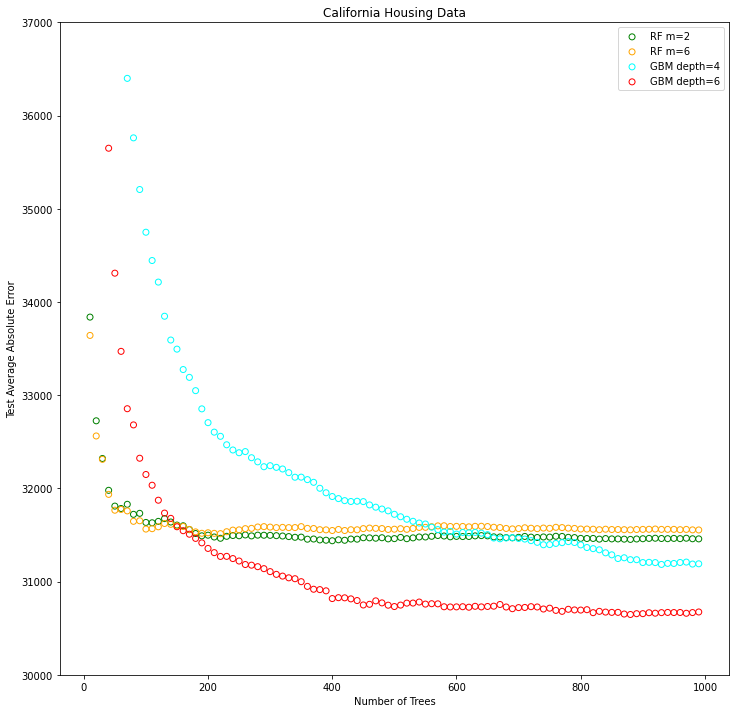

In [54]:
plt.rcParams["figure.figsize"] = (12,12)
plt.scatter((steps*np.array(range(len(RF2_MAE)))+start_val), RF2_MAE, facecolors='none', edgecolors='g')
plt.scatter((steps*np.array(range(len(RF6_MAE)))+start_val), RF6_MAE, facecolors='none', edgecolors='orange')
plt.scatter((steps*np.array(range(len(GB4_MAE)))+start_val), GB4_MAE, facecolors='none', edgecolors='cyan')
plt.scatter((steps*np.array(range(len(GB6_MAE)))+start_val), GB6_MAE, facecolors='none', edgecolors='r')

plt.ylim(30000, 37000)
plt.title("California Housing Data")
plt.xlabel("Number of Trees")
plt.ylabel("Test Average Absolute Error")
plt.legend(["RF m=2", "RF m=6", "GBM depth=4", "GBM depth=6"])


Like in figure 15.3, our experiment also shows that random forests stabilizes at around 200 trees, while the gradient boosted trees continue to improve at 1000 trees. The gradient boosted trees also outperforms the random forests.

###Feature Importance of California Housing Dataset as found by Random Forest vs Gradient Boosting

In [55]:
rf = RandomForestRegressor(n_estimators=1000, min_samples_split=6, random_state=0)
rf.fit(X_train, Y_train)

RandomForestRegressor(min_samples_split=6, n_estimators=1000, random_state=0)

In [56]:
gb = GradientBoostingRegressor(n_estimators=1000, max_depth=6, random_state=0)
gb.fit(X_train, Y_train)

GradientBoostingRegressor(max_depth=6, n_estimators=1000, random_state=0)

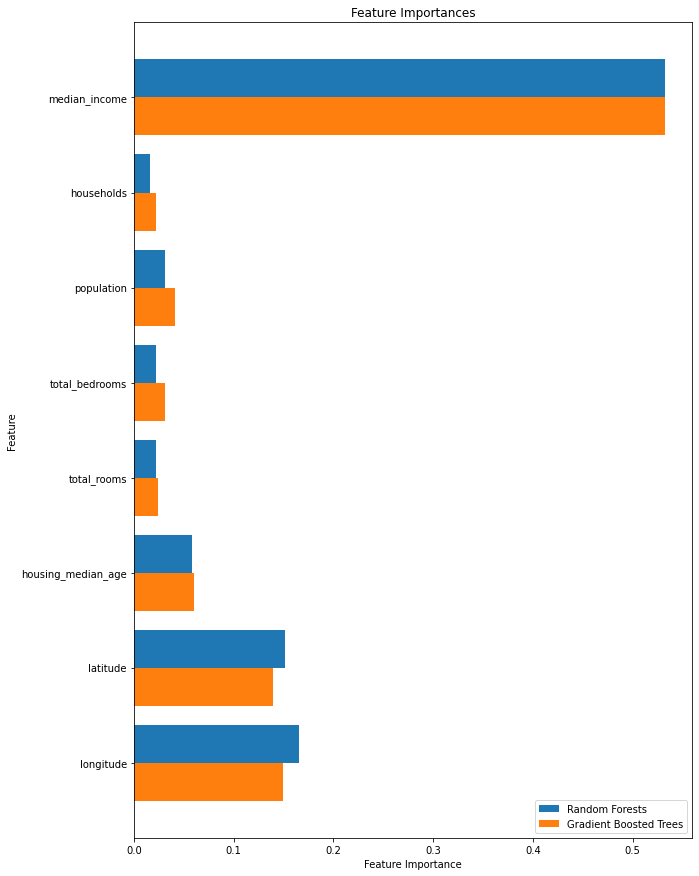

In [57]:
rf_feature_importances = rf.feature_importances_
gb_feature_importances = gb.feature_importances_
plt.figure(figsize=(10,15))
features = X_train.columns
plt.barh(np.arange(len(features))+0.2, rf_feature_importances, 0.4)
plt.barh(np.arange(len(features))-0.2, gb_feature_importances, 0.4)
plt.yticks(range(len(rf_feature_importances)), features)
plt.title("Feature Importances")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.legend(["Random Forests", "Gradient Boosted Trees"])


Random Forests and Gradient Boosted trees determine similar feature importances

# SA Heart Dataset
Second Dataset and repeat analysis

In [4]:
from google.colab import files
data_file = files.upload()

Saving SAheart.data.csv to SAheart.data.csv


In [5]:
import io
df2 = pd.read_csv(io.BytesIO(data_file['SAheart.data.csv']), index_col=0)

In [6]:
df2["famhist"] = (df2["famhist"] == "Present").astype(int)

In [7]:
df2

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
459,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
460,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
461,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0


In [8]:
df2.describe()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,0.415584,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,0.000000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000,1.000000


In [9]:
x_train2 = df2.drop(['chd'], axis=1)
y_train2 = df2['chd']

In [10]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(x_train2, y_train2, test_size=0.2, random_state=0)

In [11]:
# Normalize train, validation, and test features
X_train_mean2 = np.zeros(X_train2.shape[1])
X_train_std2 = np.zeros(X_train2.shape[1])

X_train_mean2 = np.mean(X_train2)
X_train_std2 = np.std(X_train2)

X_train2 = normalize(X_train2, X_train_mean2, X_train_std2)
X_test2 = normalize(X_test2, X_train_mean2, X_train_std2)

In [36]:
start_val = 10
steps = 10
nr_of_steps = 100
end_val = steps*nr_of_steps

In [37]:
RF2_MAE2 = np.zeros(nr_of_steps-1)
for nr_trees in range(start_val, end_val, steps):
  rf = RandomForestRegressor(n_estimators=nr_trees, min_samples_split=2, random_state=0, verbose=1)
  rf.fit(X_train2, Y_train2)
  y_hat=rf.predict(X_test2)
  index = int((nr_trees/steps) - 1)
  RF2_MAE2[index] = mean_absolute_error(Y_test2, y_hat)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [15]:
RF6_MAE2 = np.zeros(nr_of_steps-1)
for nr_trees in range(start_val, end_val, steps):
  rf = RandomForestRegressor(n_estimators=nr_trees, min_samples_split=6, random_state=0, verbose=1)
  rf.fit(X_train2, Y_train2)
  y_hat=rf.predict(X_test2)
  index = int((nr_trees/steps) - 1)
  RF6_MAE2[index] = mean_absolute_error(Y_test2, y_hat)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [17]:
GB4_MAE2 = np.zeros(nr_of_steps-1)
for nr_trees in range(start_val, end_val, steps):
  gb = GradientBoostingRegressor(n_estimators=nr_trees, max_depth=4, random_state=0, verbose=1)
  gb.fit(X_train2, Y_train2)
  y_hat = gb.predict(X_test2)
  index = int((nr_trees/steps) - 1)
  GB4_MAE2[index] = mean_absolute_error(Y_test2, y_hat)

      Iter       Train Loss   Remaining Time 
         1           0.2119            0.02s
         2           0.1990            0.02s
         3           0.1863            0.02s
         4           0.1755            0.01s
         5           0.1677            0.01s
         6           0.1599            0.01s
         7           0.1527            0.01s
         8           0.1470            0.00s
         9           0.1414            0.00s
        10           0.1359            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.2119            0.03s
         2           0.1990            0.03s
         3           0.1863            0.03s
         4           0.1755            0.03s
         5           0.1677            0.03s
         6           0.1599            0.02s
         7           0.1527            0.02s
         8           0.1470            0.02s
         9           0.1414            0.02s
        10           0.1359            0.02s
        

In [22]:
GB6_MAE2 = np.zeros(nr_of_steps-1)
for nr_trees in range(start_val, end_val, steps):
  gb = GradientBoostingRegressor(n_estimators=nr_trees, max_depth=6, random_state=0, verbose=1)
  gb.fit(X_train2, Y_train2)
  y_hat = gb.predict(X_test2)
  index = int((nr_trees/steps) - 1)
  GB6_MAE2[index] = mean_absolute_error(Y_test2, y_hat)

      Iter       Train Loss   Remaining Time 
         1           0.2062            0.02s
         2           0.1845            0.02s
         3           0.1703            0.02s
         4           0.1532            0.02s
         5           0.1409            0.02s
         6           0.1308            0.01s
         7           0.1219            0.01s
         8           0.1128            0.01s
         9           0.1053            0.00s
        10           0.0992            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.2062            0.06s
         2           0.1845            0.06s
         3           0.1703            0.06s
         4           0.1532            0.05s
         5           0.1409            0.05s
         6           0.1308            0.05s
         7           0.1219            0.04s
         8           0.1128            0.04s
         9           0.1053            0.04s
        10           0.0992            0.03s
        

In [39]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

# save to csv file, so that I don't need to rerun the training more than once
savetxt('rf2_mae2.csv', RF2_MAE2, delimiter=',')
savetxt('rf6_mae2.csv', RF6_MAE2, delimiter=',')
savetxt('gb4_mae2.csv', GB4_MAE2, delimiter=',')
savetxt('gb6_mae2.csv', GB6_MAE2, delimiter=',')

In [ ]:
from google.colab import files
files.upload()

In [ ]:
# load numpy array from csv file
from numpy import loadtxt
# load array
RF2_MAE2 = loadtxt('rf2_mae2.csv', delimiter=',')
RF6_MAE2 = loadtxt('rf6_mae2.csv', delimiter=',')
GB2_MAE2 = loadtxt('gb4_mae2.csv', delimiter=',')
GB6_MAE2 = loadtxt('gb6_mae2.csv', delimiter=',')

###Replicating figure 15.3 comparing random forests and gradient boosted trees on SA Heart Dataset

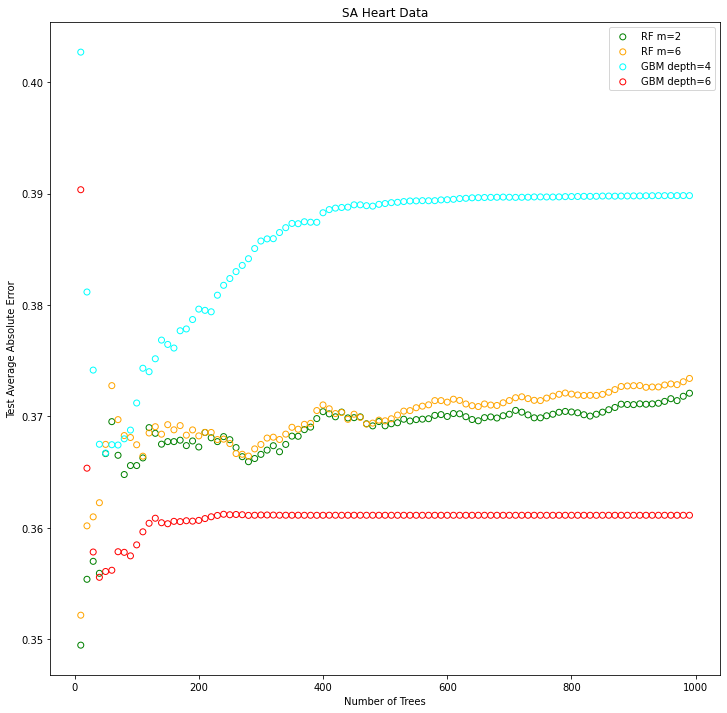

In [38]:
plt.rcParams["figure.figsize"] = (12,12)
plt.scatter((steps*np.array(range(len(RF2_MAE2)))+start_val), RF2_MAE2, facecolors='none', edgecolors='g')
plt.scatter((steps*np.array(range(len(RF6_MAE2)))+start_val), RF6_MAE2, facecolors='none', edgecolors='orange')
plt.scatter((steps*np.array(range(len(GB4_MAE2)))+start_val), GB4_MAE2, facecolors='none', edgecolors='cyan')
plt.scatter((steps*np.array(range(len(GB6_MAE2)))+start_val), GB6_MAE2, facecolors='none', edgecolors='r')

#plt.ylim(30000, 37000)
plt.title("SA Heart Data")
plt.xlabel("Number of Trees")
plt.ylabel("Test Average Absolute Error")
plt.legend(["RF m=2", "RF m=6", "GBM depth=4", "GBM depth=6"])


Similar to the California Housing dataset, for the SA Heart dataset, the gradient boosted model with interaction depth 6 outperforms the random forest models. The models seem to overfit quicker with the SA Heart dataset than the California Housing dataset. This could be because the SA Heart dataset is much smaller.

###Feature Importance of SA Heart Dataset as found by Random Forest vs Gradient Boosting

In [25]:
rf = RandomForestRegressor(n_estimators=1000, min_samples_split=6, random_state=0)
rf.fit(X_train2, Y_train2)

RandomForestRegressor(min_samples_split=6, n_estimators=1000, random_state=0)

In [26]:
gb = GradientBoostingRegressor(n_estimators=1000, max_depth=6, random_state=0)
gb.fit(X_train2, Y_train2)

GradientBoostingRegressor(max_depth=6, n_estimators=1000, random_state=0)

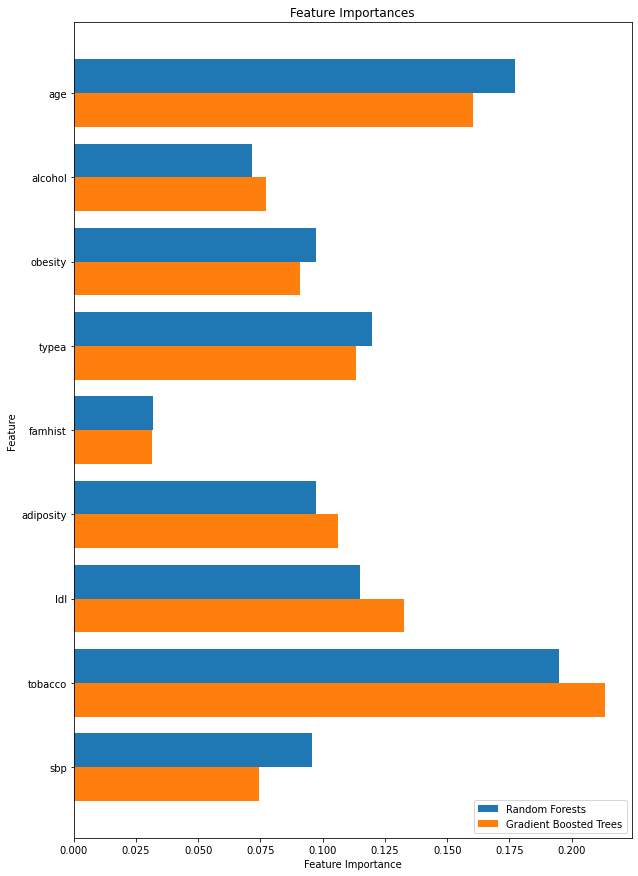

In [40]:
rf_feature_importances2 = rf.feature_importances_
gb_feature_importances2 = gb.feature_importances_
plt.figure(figsize=(10,15))
features2 = X_train2.columns
plt.barh(np.arange(len(features2))+0.2, rf_feature_importances2, 0.4)
plt.barh(np.arange(len(features2))-0.2, gb_feature_importances2, 0.4)
plt.yticks(range(len(rf_feature_importances2)), features2)
plt.title("Feature Importances")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.legend(["Random Forests", "Gradient Boosted Trees"])


Random Forests and Gradient Boosted trees determine similar feature importances